# Регрессия 101

> 🚀 В этой практике нам понадобятся: `numpy==1.26.4, pandas==2.2.2, matplotlib==3.8.4, scikit-learn==1.4.2` 

> 🚀 Установить вы их можете с помощью команды: `%pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 scikit-learn==1.4.2` 


## Содержание

* [Поговорим про шоппинг](#Поговорим-про-шоппинг)
* [Оценка модели](#Оценка-модели)
* [Пора применять современные инструменты](#Пора-применять-современные-инструменты)
* [Вопросы для закрепления](#Вопросы-для-закрепления)
* [Полезные ссылки](#Полезные-ссылки)


Привет! Это первая практика по теме машинного обучения в нашем курсе и начнем мы её с небольшого введения. Все дальнейшие ноутбуки будут построены по принципу "читаем, разбираемся и по ходу выполняем задачки". В ноутбуке вы встретите следующие блоки:

```python
  # TODO - здесь может идти длиииииинное описание ...
```
Это блок, в котором предлагается выполнить какую-нибудь задачку, чтобы пройти дальше. Не забывайте, что непосильных задач вам никто не даст, и мы в вас верим! Поэтому, не беритесь за списывание у соседей, а попробуйте сделать самостоятельно - у вас получится!

Сразу за ним обычно следует блок
```python
  # TEST
```

Блок с тестированием, в котором проверяется ваше решение. Если решение верное, то вы увидите "Well done!" в консоли. Иначе, будут ошибки с указанием на то, какой тест не удалось пройти.

Не старайтесь убрать или закомментировать тесты - это проверка сделана для того, чтобы показать, что ваше решение делает то, что необходимо по заданию. Иначе, может получиться так, что вы неправильно поняли и дальше все идет неправильно - мы ведь не хотим такого развития событий?

Другие интересные блоки:

> 🤓 Вот здесь мы обычно пишем умный текст, который содержит умные слова и важные термины. Или просто скучный правильный текст =)

> ⚠️ На это стоит обратить внимание и запомнить!

> 🔥 Хотите стать супер разработчиком - в таких блоках будут даваться маленькие советы по разработке. Чаще всего они будут отсылкой к [PEP - Python Enhancement Proposal](https://www.python.org/dev/peps/)

Вы уже закончили практику с базовыми фреймворками - замечательно! Поверьте, это было просто необходимо, чтобы не перегружать вас информацией по ходу разбора части по машинному обучению. Теперь, когда вы подкованы в работе с матрицами, математических операциях в питоне и табличном представлении данных, можно переходить к самой занимательной части - машинное обучение и зачем оно нужно.

На самом деле, раньше мы спокойно жили без машинного обучения - ученые разрабатывали умные методы, которые решали разные задачки. Это могли быть задачи предсказания погоды, стоимости акций на фондовых рынках, распознавание людей на картинке и другие. Но вот наступила эра, когда компьютеры стали настолько мощными, что мы можем для некоторых задач не разрабатывать алгоритмы, а взять **огромные объемы данных**, которые в нашем мире поступают отовсюду (за подробностями обращаемся к термину Big Data), и передать компьютеру с указанием того, что мы от него хотим. Тогда компьютер переваривает эти данные, просматривает их, выявляет **зависимости** в данных и, наконец, запоминает эти зависимости, чтобы в будущем решать ту же задачку, для которой он учился, но уже с **новыми данными**. В этой схеме важно выделить основную составляющую - **данные**. Без данных машинное обучение не работает, совсем... 

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/big_data_meme.jpg" width=600/></p>

Поэтому обратите внимание что любые действия, которые будут делаться в этом курсе - будут делаться с данными!


In [23]:
# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import sklearn

TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["font.size"] = 14
plt.rcParams["lines.markersize"] = 15
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

## Поговорим про шоппинг

Сегодня мы начнем с одной из таких задач. И, чтобы не вдаваться в хитрые научные подробности и сразу не говорить о **полиномиальной регрессионной модели с высоким коэффициентом детерминированности** (звучит как название научной работы), мы пойдем в магазин!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/did-someone-shopping-memes.jpg" width=600/></p>



Представьте себе, что мы приходим в магазин и видим 5 разных бутылочек йогурта. Посмотри, вот есть 600 мл за 58 рублей, ещё за 85 рублей видна 2х литровая банка. А вот ещё есть литр и 1.3 литра за 67 и 69! Ну и совсем мелкая за 50 - 330 мл.

Вроде всего пять разных объемов, пять разных цен, но обратите внимание - это уже можно рассматривать как некоторые данные! Давайте представим их в виде таблицы:

In [24]:
df_yogurths = pd.DataFrame({
    "volume": [600, 2000, 1000, 1300, 330],
    "price_rub": [58, 85, 67, 69, 50]
})

df_yogurths

,volume,price_rub
0,600,58
1,2000,85
2,1000,67
3,1300,69
4,330,50


Замечательно! Здесь мы видим табличные данные, в которых каждому объёму соответствует своя цена.

> 🤓 Если быть совсем точным, то такие данные называются структурированными, так как они имеют фиксированную структуру.

Такой вид представления удобен, чтобы посмотреть данные глазами, но не забывайте про другой, более удобный для общей оценки формат - графики, визуализация!

Для этого случая отлично подойдет scatter график:

> 🤓 Диаграмма рассеяния

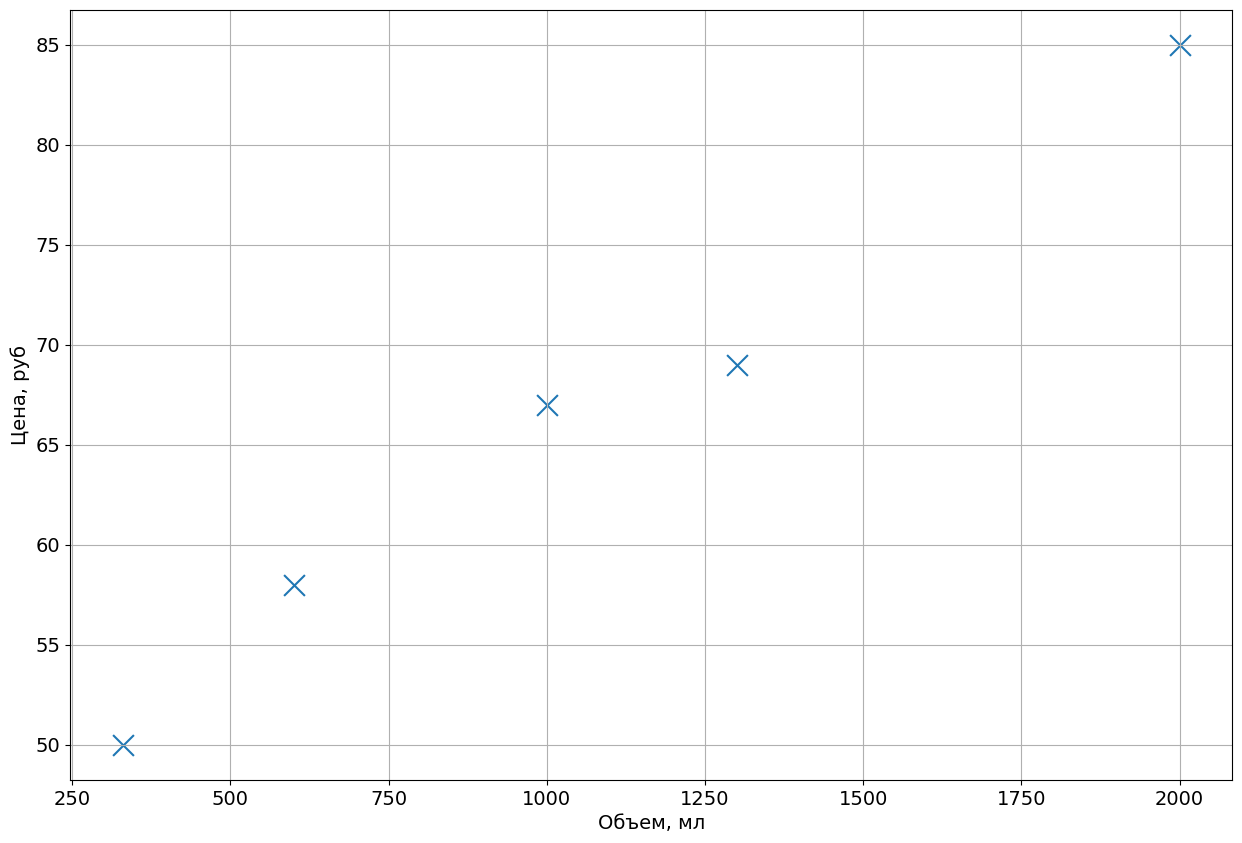

In [25]:
plt.scatter(x="volume", y="price_rub", data=df_yogurths, marker="x")
plt.xlabel("Объем, мл")
plt.ylabel("Цена, руб")
plt.grid()

Отлично! *Видите*, такой способ *посмотреть* на данные очень *нагляден* и мы сразу *видим*, что с ростом объёма йогурта растёт и цена!

> ⚠️ Данные, как правило, имеют точечный характер. Например, в наших данных есть информация о конкретных объёмах и конкретных ценах. На графике видно, что они являются точками.

Вот мы и пришли к первому выводу сегодняшней практики - данные содержат **зависимости** внутри себя. 

Зависимости - это то, что является самым интересным в данных, и именно они позволяют нам делать выводы об окружающем мире!

В этих данных мы видим, что цена и объём зависят между собой, потому что с ростом цены растёт объём и наоборот.

> 🤓 Если вы уже знаете, что такое **корреляция**, то вы знаете, что наличие зависимостей можно оценить именно с её помощью. Если нет, то не переживайте - узнаете чуть позже.

Определить наличие зависимостей в данных - это уже огромный результат, но вот как их использовать? Давайте подумаем... хм..

> ✨Вот здесь вы можете обсудить с предподавателем идеи, если занятие идет очно =)

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/think_about_it_image.png" width=600/></p>

Итак, мы можем сказать, что у нас есть зависимость цены от объёма. С увеличением объёма растёт и цена. Что если мы попробуем выяснить, насколько сильно растет цена на единицу объёма - то есть постараемся описать рост прямой линией? Так мы узнаем, сколько стоит 1500 мл и даже 3000 мл йогурта!

> 🤓 Если вы запамятовали, то прямая линия описывается уравнением $y = k*x+b$

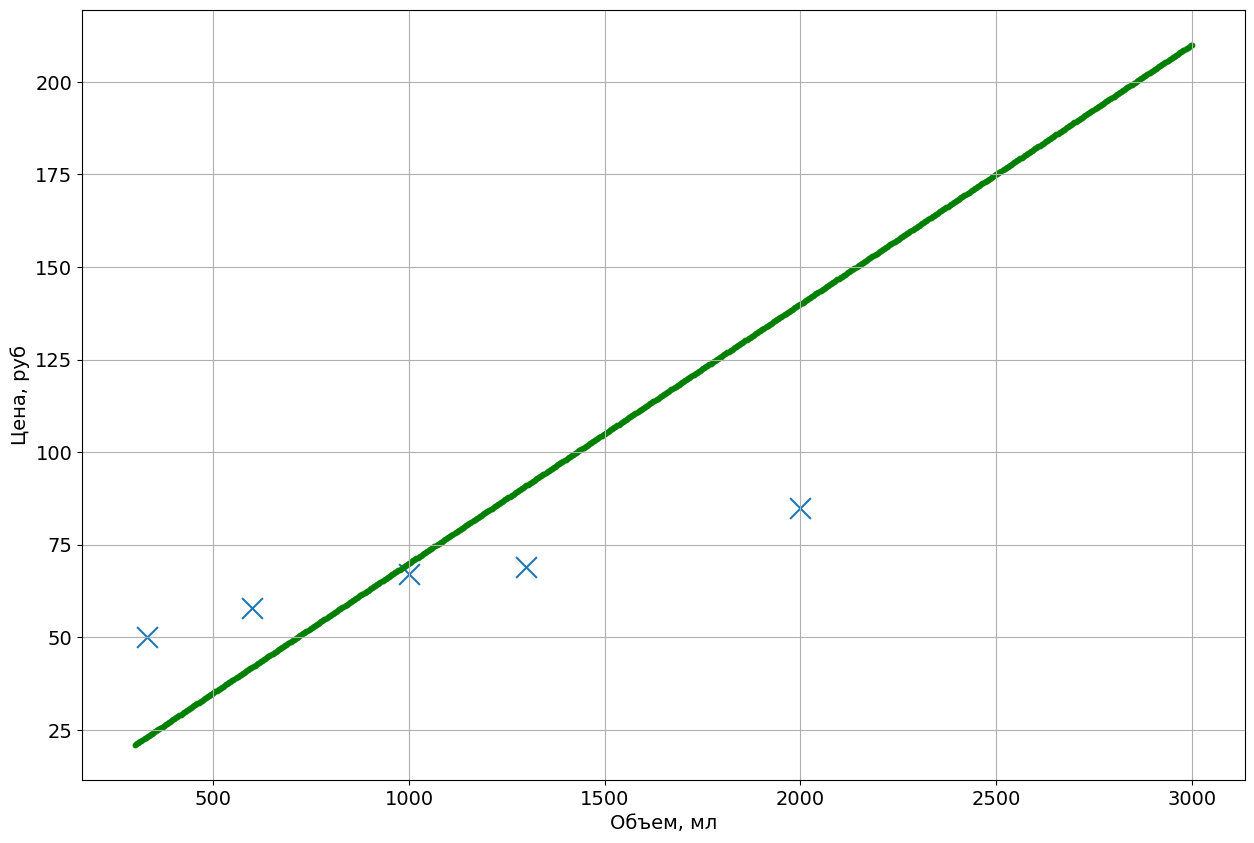

In [26]:
LINE_K = 0.07
LINE_B = 0

x_points = np.linspace(300, 3000, 1000)
y_points = x_points * LINE_K + LINE_B

plt.scatter(x="volume", y="price_rub", data=df_yogurths, marker="x")
plt.scatter(x_points, y_points, c="g", s=10)
plt.xlabel("Объем, мл")
plt.ylabel("Цена, руб")
plt.grid()

> 🔥 Почему в коде `LINE_K` и `LINE_B` названы большими буквами? В практике разработки на Python есть правило, что константы именуются прописными буквами. Это же правило есть и в других языках. Подробнее [PEP8](https://www.python.org/dev/peps/pep-0008/#constants)

Смотрите, мы нарисовали линию, но она проходит далеко от точек. Давайте попробуем подобрать такие коэффициенты, чтобы она шла как можно точнее через точки:

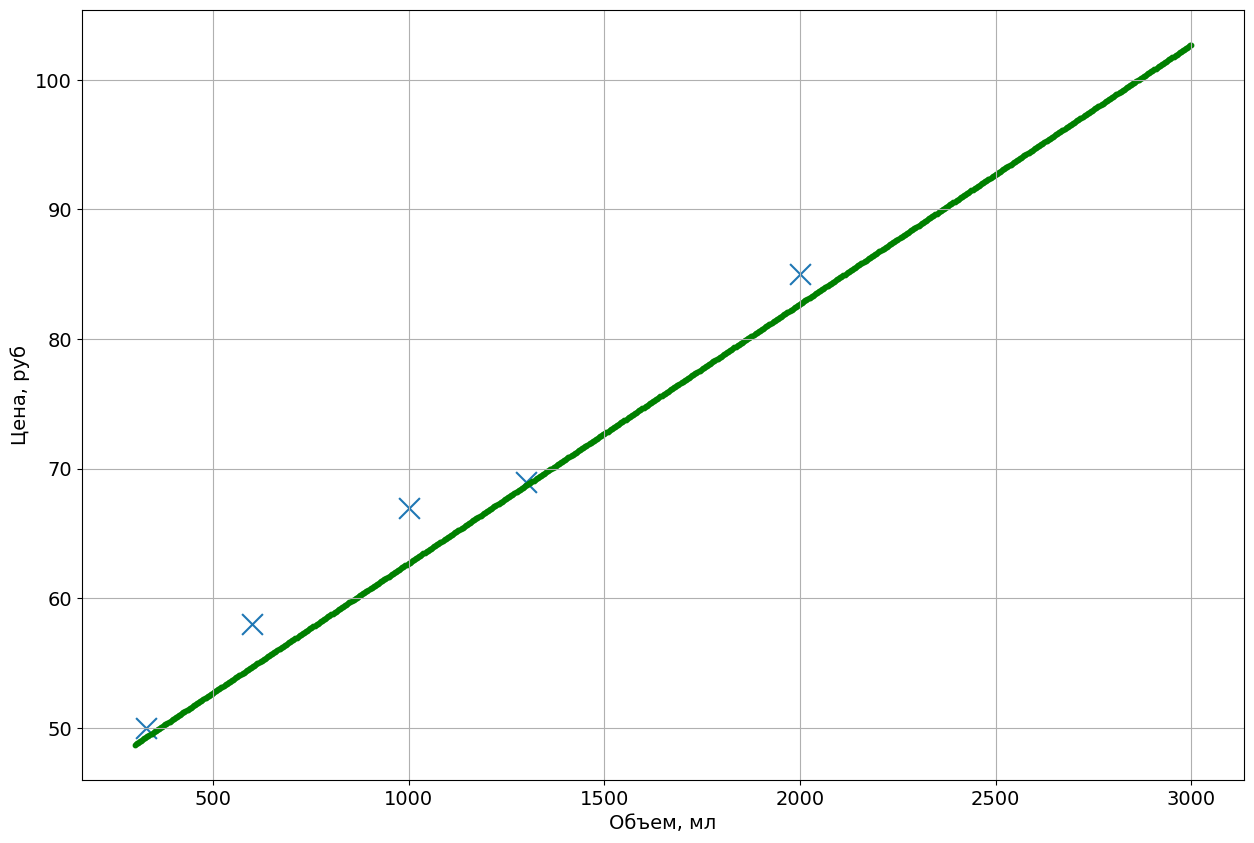

In [27]:
# TODO - подберите коэффициенты так, чтобы линия лучше всего пересекалась с точками
# NOTE - если вы сможете провести прямую линию ровно через все точки в этих данных - вау! Но вообще, это невозможно =) 
LINE_K = 0.02
LINE_B = 42.7

x_points = np.linspace(300, 3000, 1000)
y_points = x_points * LINE_K + LINE_B

plt.scatter(x="volume", y="price_rub", data=df_yogurths, marker="x")
plt.scatter(x_points, y_points, c="g", s=10)
plt.xlabel("Объем, мл")
plt.ylabel("Цена, руб")
plt.grid()
plt.show()

In [28]:
# TEST - проверимс ваше решение
_test_x_values = df_yogurths["volume"]
_test_y_values = df_yogurths["price_rub"]

_test_y_pred = _test_x_values * LINE_K + LINE_B
_test_err = np.abs(_test_y_pred-_test_y_values).mean()

assert _test_err < 4
print("Well done!")

Well done!


Проверка прошла и вы видите надпись `Well done!`? Отлично!

Это означает, что вы правильно настроили линию, чтобы она проходила через точки! Молодцы!

А зачем мы это делали? Хм-хм. Ну, давайте посмотрим, сейчас наша линия проходит так же, как изменяются данные о цене при росте объема. То есть, мы описали большой набор (представим, что сотни строк) наших данных простой зависимостью $y=kx+b$. Короче, мы выразили наши данные в виде формулы! То есть теперь, вместо того, чтобы знать, сколько стоят конкретные объёмы йогурта, мы можем **предсказать**, сколько будет стоить, например, 1.5 литра!

Что за магия? Какие **предсказания**? Почему??

Все просто, мы предсказываем, потому что в наших данных нет информации о 1500 мл. Это **новые данные** для нас, поэтому это называется предсказанием!

> 🤓 Описание данных зависимостью вида $y=f(x)$ - это описание **дискретных** данных **аналитической** зависимостью.

Но перед этим, давайте завернем нашу прекрасную формулу в функцию:

In [29]:
# TODO - напишите функцию predict_price(), которая на вход принимает массив объемов и возвращает массив цен для него
# NOTE - коэффициенты запишите константами внутри функции
def predict_price(volumes):
    LINE_K = 0.02
    LINE_B = 42.7
    prices = volumes * LINE_K + LINE_B
    return prices



In [30]:
# TEST - проверимс ваше решение
_test_x_values = df_yogurths["volume"]
_test_y_values = df_yogurths["price_rub"]

_test_y_pred = predict_price(_test_x_values)
_test_err = np.abs(_test_y_pred-_test_y_values).mean()

assert _test_err < 4
print("Well done!")

Well done!


> 🔥 Зачем нам писать функцию? Это нужно, чтобы в дальнейшем применять этот код в конечной системе. Такой шаг называется **интеграция**. В ходе разработки ваш код может быть путанным и плохо организованным, но завершающий этап - организация кода в хороший, комментированный и легкочитаемый вид, чтобы была возможность это поддерживать, а иногда даже сопровождать. Не забывайте ухаживать за своим кодом! Вы в ответе за то, что вы создали...



Молодцы, а теперь давайте посмотрим, сколько же будут стоить йогурты объёмом 1.5 и 3 литра?

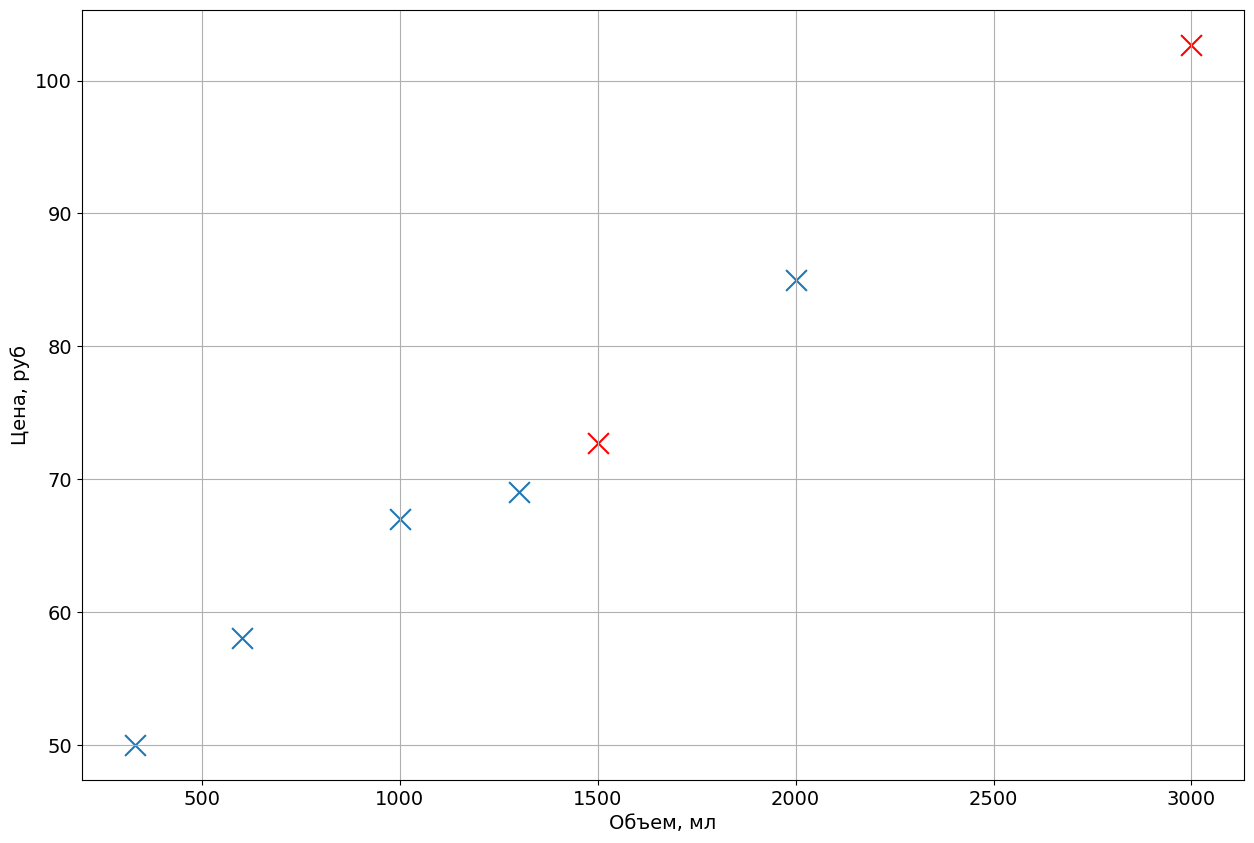

In [31]:
new_volumes = np.array([1500, 3000])
predicted_prices = predict_price(new_volumes)

plt.scatter(x="volume", y="price_rub", data=df_yogurths, marker="x")
plt.scatter(new_volumes, predicted_prices, c="r", marker="x")
plt.xlabel("Объем, мл")
plt.ylabel("Цена, руб")
plt.grid()
plt.show()

Видите, похоже на правду! Мы только что предсказали цены на новые объемы, при этом опираясь только на те данные, что мы имели! Круто, поздравляю!!

Вы большие молодцы, потому что вы только что разработали модель предсказания цены по объёму продукта!

> 🤓 Модель машинного обучения - алгоритм, который может быть обучен (настроен) на данных и далее использован для предсказания на новых данных

Но не спешите бежать её продавать - давайте сначала разберёмся в терминах, которые нам пригодятся в будущем =)

Несмотря на то, что пока что наша модель сама не училась, а мы ее ручками настроили, здесь есть пара важных моментов.

Когда мы попытались выразить наши точки через прямую линию, мы по сути **аппроксимировали** данные зависимостью вида $y=f(x)$. То есть, описали точки через прямую линию.

> 🤓 Аппроксимация - описание зависимости в данных аналитической формулой, это может быть прямая линия $y = kx+b$, полином $y=ax^2+bx+c$, логарифм $y=log(x)$ или что угодно другое.

У нас две переменные цена и объём, при этом цена зависела от объёма. Это означает, что цена является тем, что мы хотим предсказывать - наша цель предсказания (или, проще, целевая переменная), а объём - переменная, по которой мы хотим предсказывать. В народе (ну или коммьюнити) переменные, по которым делаются предсказания называются признаками (или через англицизм - фичи).

> 🤓 Признаки (фичи - features) - **независимые** переменные, которые используются для предсказания зависимой переменной. Ещё есть название *предикторы*.

> 🤓 Целевая переменная - **зависимая** переменная в данных, которую мы хотим предсказать по независимым переменным.

Подводя итоги того, что мы тут натворили, изначально у нас были данные о йогуртах, которые мы собрали в магазине. Данные имели пять записей (примеров) и две переменные: объём и цена. Мы поставили задачу так, что цену выбрали в качестве зависимой переменной, а объём в качестве независимой. Далее построили аналитическую зависимость $y = kx+b$, в которой $y$ - цена, $x$ - объём. Ну, и наконец, смогли предсказать цену для новых объёмов!

А как правильно назвать $k$ и $b$, они же тоже участвуют в уравнении? Хороший вопрос! 

Это **параметры** модели - их мы настраивали сами. То есть, учился алгоритм не сам, а мы его учили так, чтобы настроить как хочется. Но не переживайте, скоро дойдёт до того, что не мы будем подбирать коэффициенты, а модель сама будет учиться по данным!

> 🤓 Параметры модели машинного обучения - это параметры алгоритма, которые настраиваются в ходе обучения.

Отлично, немного отдохнём и дальше в путь, мы же большие молодцы!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/have_a_rest_sure.jpg" width=600/></p>

## Оценка модели

Визуально подбирать коэффициенты - это круто, но тут есть две проблемы:

1. Вы представляете, чтобы мы сидели и каждый раз подбирали коэффициенты для каждой модели? В практике за день бывает доводится поработать с десятком сложных моделей со множеством коэффициентов - это неблагодарный труд =(

2. Чтобы подобрать коэффициенты, мы нарисовали зависимость цены от объёма, а что если в данных мы используем ещё больше фич, например, количество дней для хранения йогурта, тип упаковки, страна производства и ещё десяток других? Рисовать такое на одном графике уже затруднительно.

Что же нам делать в таком случае? Получается, мы пока что не умеем заставлять модель учиться самостоятельно, но уже хочется на данных делать крутые модели для предсказания!

Не беспокойтесь, умные люди придумали **метрики** оценки для разных случаев. С некоторыми из них мы сейчас и познакомимся!

> 🤓 Метрика оценки - количественная характеристика оценки какого-либо явления. Например, есть метрики точности, нормальности, ошибки и т.д.

> ⚠️Визуализация данных полезна для общего восприятия и анализа зависимостей, но это есть **качественная** оценка. Для сравнительного анализа лучше использовать **количественную** оценку - метрики.

Когда мы подбираем коэффициенты, наша линия может проходить через точки или нет - это качественная оценка ситуации. Как же нам сказать, насколько "хорошо" она проходит через точки? 

Мы можем посмотреть, насколько сильно расходится **истинное** значение в данных от **предсказанного** моделью. 

> 🤓 Истинное значение - значение целевой переменной в данных.

> 🤓 Предсказанное значение - значение, которое предсказывает модель на конкретных значениях фич при определенных параметрах.

То есть, у нас есть в данных пять примеров объёмов - мы можем посмотреть, какие цены имеют эти объёмы в реальности (истинные значения) и какие предсказывает модель при определённых коэффициентах (предсказанные). 

Давайте напишем функцию предсказания, но уже на вход будут поступать коэффициенты, чтобы было проще управлять кодом:

In [32]:
# TODO - напишите функцию предсказания predict_price_linear(), которая на вход принимает вектор признаков, коэффициент k и коэффициент b
def predict_price_linear(y, LINE_K, LINE_B): 
        prices = y * LINE_K + LINE_B
        return prices



In [33]:
# TEST - проверимс ваше решение
_test_y_pred = predict_price_linear(np.array([1, 2, 4]), 1, 2)
np.testing.assert_array_almost_equal(_test_y_pred, [3, 4, 6])

print("Well done!")

Well done!


А теперь посмотрим, насколько ошибается модель на наших данных в предсказаниях по сравнению с истинными значениями:

In [34]:
LINE_K = 0.1
LINE_B = 0

# Вектор истинных значений
y_true = df_yogurths["price_rub"]
# Признаки
x = df_yogurths["volume"]

# Вектор предсказаний
y_pred = predict_price_linear(x, LINE_K, LINE_B)

# Вектор ошибок
error = y_true-y_pred

error

0     -2.0
1   -115.0
2    -33.0
3    -61.0
4     17.0
dtype: float64

Вооу, вот это ошибки, во втором случае мы промахнулись на 115 рублей - многовато! 

Вот мы получили вектор того, насколько расходится истинное значение с предсказанным - уже что-то. Может попробовать просматривать каждую ошибку и смотреть, насколько каждая изменилась?

> А теперь представим, что у нас 1 000 000 записей данных (миллион) - мы же запаримся анализировать ошибки =(

Тогда нам нужно выразить это одним числом, чтобы затем каждое изменение параметров нам говорило, линия лучше описывает данные или нет. 

Что же делать...

Начнем знакомство с первой метрики под названием Mean Absolute Error (Средняя абсолютная ошибка). Она очень простая, вот формула:

$$ MAE = (\frac{1}{n})\sum_{i=1}^{n}\left | y_{pred} - y_{true} \right | $$

Смотрите, всего-то, берём разницу каждого примера, берём от этого абсолютное значение, а потом суммируем всё и делим на количество. Последние два действия - по сути взятие среднего от вектора. Попробуйте!

In [35]:
# TODO - напишите функцию вычисления MAE под название compute_MAE(), которая принимает вектор истинных значений и вектор предсказанных
def compute_MAE(real_val, predicted_val): 
        mean = sum(abs(real_val - predicted_val)) / len(real_val)
        return mean

In [36]:
# TEST - проверимс ваше решение
_test_mae_1 = compute_MAE(np.array([1, 2, 4]), np.array([4, 2, 1]))
np.testing.assert_equal(_test_mae_1, 2)
_test_mae_2 = compute_MAE(np.array([10, 20, 3]), np.array([2, 1, 0]))
np.testing.assert_equal(_test_mae_2, 10)

print("Well done!")

Well done!


У вас получилось, отлично!

Давайте теперь посмотрим, какая сейчас у нас ошибка при наших коэффициентах!

In [37]:
data_mae = compute_MAE(y_true, y_pred)

print(f"Yoghurt linear predict MAE: {data_mae}")

Yoghurt linear predict MAE: 45.6


Таким образом MAE показывает среднюю ошибку в предсказании на данных - 45.6 рублей. Много это или мало трудно сказать вот так, но это нам сейчас не нужно. Все потому, что мы будем использовать эту метрику для сравнения наших моделей при разных значениях параметров. Нам ведь нужно от чего-то отталкиваться?..

> ⚠️ Метрика средней абсолютной ошибки показывает ошибку в тех же единицах, что и единицы самих данных.

> ⚠️ Метрики точности всегда оцениваются на данных, у которых есть истинные значения (разметка). Без разметки оценку провести невозможно!

Так как же мы будем проводить настройку? Сами посудите, метрика показывает ошибку, а чем меньше ошибка, тем лучше! Давайте попробуем настроить нашу модель таким образом, чтобы получить наименьшую ошибку MAE! Пробуем!

In [38]:
# TODO - подберите коэффициенты так, чтобы ошибка была минимальна 
# NOTE - не забывайте, что вы уже настраивали визуально коэффициенты, попробуйте и их!
# TODO* - попробуйте написать код автоматического поиска коэффициентов
LINE_K = 0.02
LINE_B = 42.7

for data_mae in range(3):
    LINE_K = LINE_K + 3*np.e**-9 - 2*np.e**-25 - 2*np.e**-40

    LINE_B = LINE_B + np.e**-17

    y_true = df_yogurths["price_rub"]
    x = df_yogurths["volume"]

    y_pred = predict_price_linear(x, LINE_K, LINE_B)

    data_mae = compute_MAE(y_true, y_pred)

    print(f"Yoghurt linear predict MAE: {data_mae}")

Yoghurt linear predict MAE: 1.8652593189217144
Yoghurt linear predict MAE: 1.670518637843432
Yoghurt linear predict MAE: 1.4757779567651497


In [39]:
# TEST - проверимс ваше решение
_test_x_values = df_yogurths["volume"]
_test_y_values = df_yogurths["price_rub"]

_test_y_pred = predict_price_linear(_test_x_values, LINE_K, LINE_B)
_test_err = compute_MAE(_test_y_values, _test_y_pred)

assert _test_err < 1.5
print("Well done!")

Well done!


Отлично, мы без графиков смогли настроить модель так, чтобы ошибка предсказания на известных данных была минимальна! Но давайте сверимся, что наша прямая линия действительно проходит через точки:

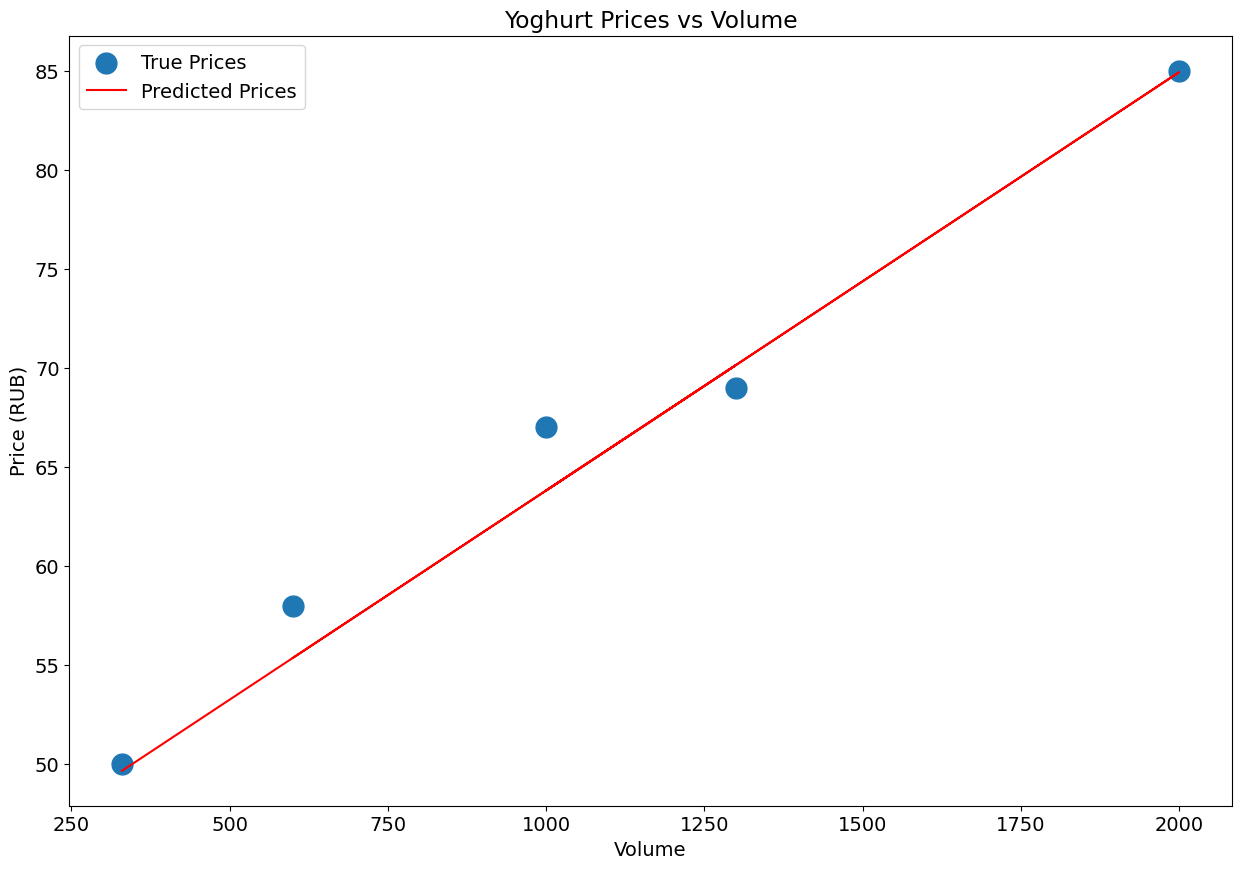

In [40]:
# TODO - напишите код отображения точек данных и линии предсказания
import matplotlib.pyplot as plt

LINE_K = 0.02
LINE_B = 42.7

plt.scatter(x, y_true, label='True Prices')
plt.plot(x, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Volume')
plt.ylabel('Price (RUB)')
plt.title('Yoghurt Prices vs Volume')
plt.legend()
plt.show()


Воу-воу, вот это мы молодцы! Без графиков смогли настроить модель, да ещё и она действительно повторяет закономерность в данных! Замечательно!

Получается, с помощью численных оценок ошибки предсказаний по метрике MAE модели мы смогли настроить нашу модель так, чтобы она давала наименьшую ошибку предсказания!

В целом, если говорить о машинном обучении, то примерно так модель и учится - перебирает параметры, глядя на метрику ошибки, и пытается свести её к минимуму. Только делает это чуть умнее - не простым перебором.

> В данных практиках мы не будем рассматривать алгоритм обучения, но вы можете попробовать свои силы в реализации, чтобы лучше его понять. Для этого обратитесь к преподавателю за дополнительным заданием.

Итак, мы смогли создать свою модель, научились предсказывать на новых данных, да ещё и оценили ошибку настройки количественно - прям по-научному! Круто - большие молодцы!

## Пора применять современные инструменты

Писать модель машинного обучения вручную - дело очень полезное, но крайне непродуктивное.

> 🔥 В мире разработки существует огромное количество готовых решений. Вне зависимости от задачи первым дело проверяйте, существуют ли готовые решения и насколько они поддерживаемы. Писать код с нуля при наличии подходящих готовых решений считается *велосипедостроением* и не приветствуется. Не забывайте про анализ готовых решений!

Чтобы поддерживать актуальность, мы будем пользоваться билиотекой [scikit-learn](https://scikit-learn.org/), которая является де-факто одной из стандартных библиотек в задачах машинного обучения.

Откроем вам маааленький секрет, задача, которую мы с вами решали - описание зависимости целевой переменной от признаков - называется **задача регрессии**, а модель, которую мы разработали - **линейная регрессия**.

Сейчас у нас был один признак и одна целевая переменная, поэтому уравнение зависимости имело вид $y=kx+b$. Помните, что $k$ и $b$ - параметры модели? Так вот, коэфициент $k$ называется весом признака $x$, а коэффициент $b$ - константное смещение.

Если бы в наших данных был бы ещё один признак, например, количество дней хранения, то наше уравнение имело бы вид: $$y = w_1*x_1+w_2*x_2+w_0$$

> Не пугайтесь, просто заменили $k \rightarrow w_1$, а $b \rightarrow w_0$, чтобы привести к более общему виду =)

Здесь $x_1$ - объем упаковки, $x_2$ - количество дней хранения. Как видите, каждый признак имеет вес, обозначаемый $w_n$. Таким вот нехитрым образом мы может делать модель предсказания, если в наших данных целевая переменная зависит не от одного, а от многих признаков!

В общем виде, можно написать уравнение для $n$ признаков:

$$y = \sum_{i=1}^{n} w_i*x_i + w_0$$

Так к чему все эти разговоры? Просто, этот маленький факт позволяет заглянуть в функционал фреймворка `sklearn` по [части регрессии](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) и увидеть, сколько там всего интересного!

Начнем мы с построения модели, давайте воспользуемся классом [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) для обучения модели:

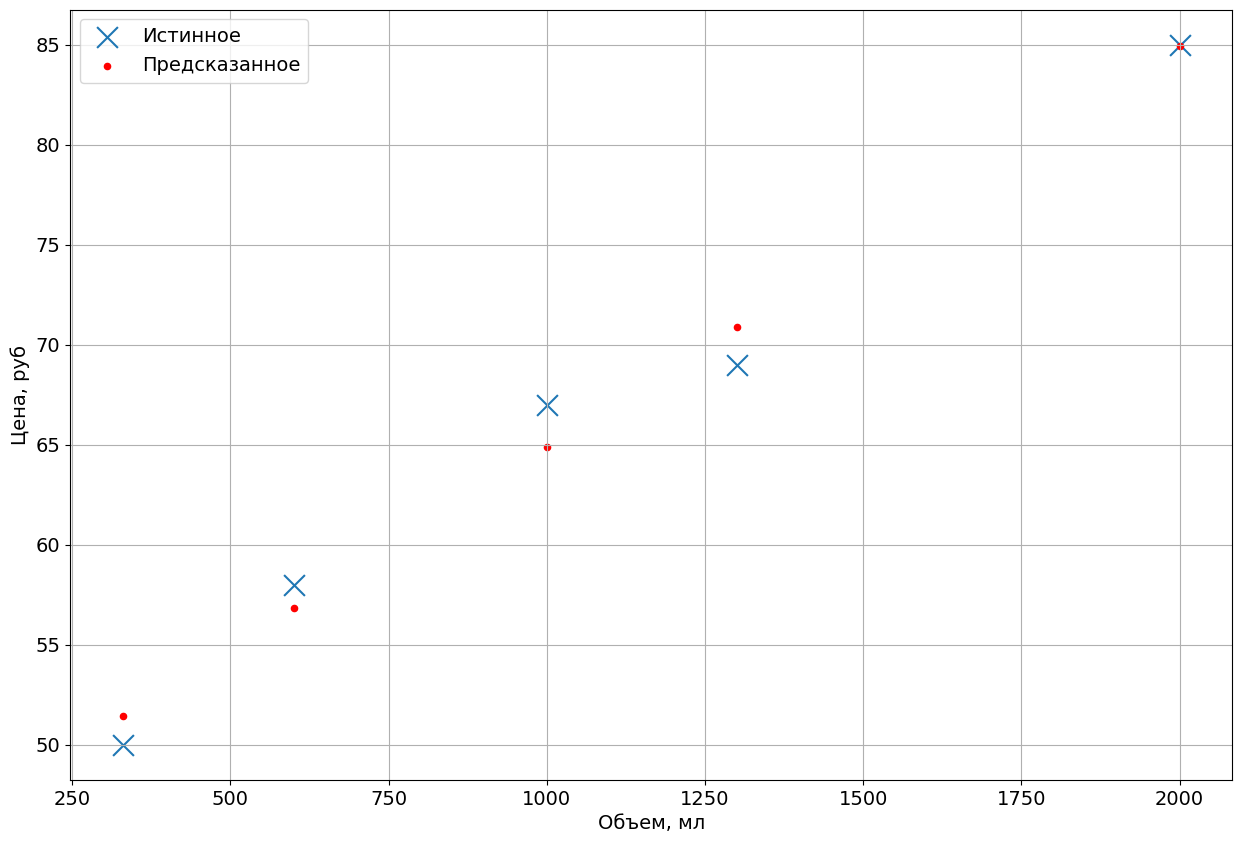

In [41]:
from sklearn.linear_model import LinearRegression

# Создаем объект класса LinearRegression
reg_model = LinearRegression()

# Применяем .fit() метод с передачей матрицы признаков и вектором разметки (истинных значений)
y_true = df_yogurths["price_rub"]
x = df_yogurths["volume"].values
# NOTE - модели обычно используют матрицу признаков, но в нашем случае это всего лишь вектор, поэтому меняем размер
x_matrix = x.reshape(-1, 1)
reg_model.fit(x_matrix, y_true)

# Используем модель для предсказания на известных данных
y_pred = reg_model.predict(x_matrix)

plt.scatter(x, y_true, marker="x", label="Истинное")
plt.scatter(x, y_pred, c="r", marker="o", s=20, label="Предсказанное")
plt.xlabel("Объем, мл")
plt.ylabel("Цена, руб")
plt.legend()
plt.grid()

Вот таким маленьким кодом мы обучили модель, сделали предсказания на данных и видим, что предсказанные значения близки к истинным! В этом сила фреймворков - они организуют работу и заворачивают в себя код, который выполняет большую и сложную работу.

> 🤓 Свойство включать в себя атрибуты (переменные внутри класса), методы (функции класса) для работы с атрибутами называется **инкапсуляция**. Это одно из свойств, на котором строится ООП и которым обладают классы в Python. 

Так как `LinearRegression` - класс, то он включает в себя атрибуты (увидим позже) и методы (`.fit()`, `.predict()`), которые позволяют удобно выполнять требуемые задачи.

По сути, метод `.fit()` организует поиск таких коэффициентов модели линейной регрессии, чтобы минимизировать ошибку.

Давайте сравним значения ошибки при ручном поиске и при обучении с помощью класса LinearRegression:

In [42]:
y_pred_manual = predict_price_linear(x, LINE_K, LINE_B)
y_pred_sklearn = y_pred

mae_manual = compute_MAE(y_true, y_pred_manual)
mae_sklearn = compute_MAE(y_true, y_pred_sklearn)

print(f"MAE manual vs sklearn: {mae_manual} | {mae_sklearn}")

MAE manual vs sklearn: 2.179999999999997 | 1.3330979909021976


Как видим, ошибка модели sklearn не сильно отличается от той, что мы получили при настройке руками. А теперь пора взглянуть на коэффициенты, которые получились при настройке через [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Для этого перейдем по ссылке и посмотрим, в каких атрибутах хранятся веса модели. Воспользуемся знаниями из документации для сравнения:

In [43]:
print(f"Manual setup parameters: {LINE_K} | {LINE_B}")
print(f"LinearRegerssion parameters: {reg_model.coef_} | {reg_model.intercept_}")

Manual setup parameters: 0.02 | 42.7
LinearRegerssion parameters: [0.02005899] | 44.81829274071265


Как видно, коэффициенты у моделей тоже сходятся! Замечательно!

Давайте теперь выполним последнюю задачку - сравните работу своей функции `compute_MAE()` и функции фреймворка [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).

In [44]:
# TODO - сравните результаты вычисления с точностью до 6го знака
# NOTE - используйте y_true и y_pred

from sklearn.metrics import mean_absolute_error
mae_custom = compute_MAE(y_true, y_pred)
mae_sklearn = mean_absolute_error(y_true, y_pred)
mae_custom, mae_sklearn


(1.3330979909021976, 1.3330979909021976)

Если результаты функций сходятся до шестого знака, то все сделано правильно и, как видите, наши вычисления проводятся с точностью до шестого знака, как это делается в признанном фреймворке! Отличный результат!

> 🔥 Почему мы сразу не пользовались функцией `mean_absolute_error()`? Использование фреймворков - полезный и продуктивный подход, но слепое использование готового кода может приводить к серьёзным ошибкам и постыдным решениям. Не забывайте разбираться и анализировать, что вы делаете и понимать принципы тех фреймворков, с которыми вы работаете. Эти знания могут вам сильно пригодиться в будущем, чтобы разбираться с новыми фреймворками, так как многие построены по одинаковым или похожим принципам. Также, хорошее понимание принципов тех или иных методов и алгоритмов уменьшает шанс ошибки, так как сразу видно, где что-то идет не так.

Вот так мы и смогли обучить реальную модель машинного обучения и применить современные инструменты, которыми пользуются разработчики со всего мира, чтобы настроить модель на предсказания цены йогуртов! Какие мы молодцы!
В дальнейшем мы ещё много всего узнаем, но уже сейчас мы научились многому новому, что поможет нам в дальнейшем!

## Вопросы для закрепления

А теперь пара вопросов, чтобы закрепить материал!

1. Почему регрессия "линейная"? 
2. Есть ли смысл предсказывать данные, на которых обучалась модель? 
3. Зачем изменять размер вектора фичей (в случае, когда только 1 признак) для обучения модели? 
4. Зачем нужна метрика MAE? 
5. Нужно ли заново переучивать модель при появлении новых данных? 

## Полезные ссылки
* [Linear Regression от StatQuest](https://www.youtube.com/watch?v=nk2CQITm_eo)
